## **ANALYSING NIGERIA'S EXPORT**

#### **INTRODUCTION**

Favour, a data analyst I follow on Twitter, shared this dataset as a weekly challenge to have fun and flex problem solving skills.

**1.1 About the Dataset**

The dataset includes information about a few of Nigeria's agricultural exports, inluding the products export, units exported and by which company.

* Product Name: Product being exported
* Company: Name of the company that exports the products
* Export Country: The country the products are exported to 
* Date: The date the product was exported
* Units Sold: The amount of the product that was sold
* Unit Price: How much each unit was sold for
* Profit per unit: How much profit is gotten from each unit sold
* Export Value: [means the net amount of the exporter’s sale price for the commodity delivered to the participant under a commodity agreement](https://www.lawinsider.com/dictionary/export-value)
* Destination Port: port from which the products are exported
* Transportation mode: mode of transport used to ferry the items

#### **IMPORTING DATA AND PRE-PROCESSING**

In [1]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# import dataset
ex = pd.read_csv('/kaggle/input/nigerian-agricultural-exports/nigeria_agricultural_exports.csv')

# convert to dataframe
ex = pd.DataFrame(ex)

In [2]:
# check the shape of the dataframe
ex.shape

(1000, 10)

In [3]:
# check the head of the dataset
ex.head()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode
0,Rubber,Farmgate Nigeria Limited,Austria,11/16/2023,721,31443.05,5863.92,22670439.05,Lagos,Sea
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,1/8/2021,881,23151.97,5868.73,20396885.57,Lagos,Sea
2,Cassava,Farmgate Nigeria Limited,Germany,10/14/2020,702,18536.45,5105.01,13012587.90,Calabar,Sea
3,Rubber,Nigerian Export Promotion Council (NEPC),Belgium,12/31/2022,191,21981.31,7781.54,4198430.21,Warri,Sea
4,Sesame,Nigeria Agro Export Company,France,12/19/2022,373,13415.94,9590.95,5004145.62,Lagos,Sea


In [4]:
# check the tail of the dataset
ex.tail()

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode
995,Cashew,Nigeria Agro Export Company,Netherlands,6/11/2023,730,49937.99,9149.40,36454732.70,Warri,Sea
996,Rubber,Agro Export Nigeria Ltd,Sweden,11/1/2023,952,15607.62,5086.57,14858454.24,Lagos,Sea
997,Rubber,Agro Allied Exporters Nigeria Limited,Netherlands,8/6/2023,447,49544.50,6381.92,22146391.50,Lagos,Sea
998,Cashew,Greenfield Agro Exporters Nigeria Limited,Germany,3/5/2023,315,42814.92,6620.22,13486699.80,Lagos,Sea
999,Cassava,Nigeria Agro Export Company,Denmark,8/9/2020,504,10656.58,9979.02,5370916.32,Lagos,Sea


In [5]:
# check the column names
print(ex.columns)

Index(['Product Name', 'Company', 'Export Country', 'Date', 'Units Sold',
       'unit_price', 'Profit per unit', 'Export Value', 'Destination Port',
       'Transportation Mode'],
      dtype='object')


In [6]:
# check for duplicates
ex.duplicated().sum()

0

In [7]:
# check for nulls 
ex.isnull().sum()

Product Name           0
Company                0
Export Country         0
Date                   0
Units Sold             0
unit_price             0
Profit per unit        0
Export Value           0
Destination Port       0
Transportation Mode    0
dtype: int64

In [8]:
# check the data types
print(ex.dtypes)

Product Name            object
Company                 object
Export Country          object
Date                    object
Units Sold               int64
unit_price             float64
Profit per unit        float64
Export Value           float64
Destination Port        object
Transportation Mode     object
dtype: object


In [9]:
# convert date to date data type
ex['Date'] = pd.to_datetime(ex['Date'], format='%m/%d/%Y', errors='coerce')

In [10]:
# get a summary of the data
ex.describe()

,Date,Units Sold,unit_price,Profit per unit,Export Value
count,1000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2021-12-30 07:03:21.599999744,536.804000,30010.266660,6125.299550,1.631766e+07
min,2020-01-05 00:00:00,103.000000,10006.540000,2000.300000,1.323777e+06
25%,2021-01-03 00:00:00,322.750000,20013.620000,4261.327500,7.669552e+06
50%,2021-12-25 00:00:00,519.000000,30082.600000,6132.150000,1.441451e+07
75%,2022-12-31 00:00:00,743.250000,39955.005000,8038.315000,2.262969e+07
max,2023-12-30 00:00:00,999.000000,49985.860000,9990.570000,4.712082e+07
std,NaN,251.311112,11515.423486,2269.844681,1.028734e+07


In [15]:
# create a copy
df = ex.copy()

**SUMMARY**

There are no missing values.

There are no null values

There are no duplicates

Not all columns were assigned the correct data type, so the date column was converted to the correct datatype. 

#### DATA ANALYSIS

#### **1. Sales Performance**

**1.1 What are the top selling products?**

Text(0.5, 1.0, 'Top Selling Products')

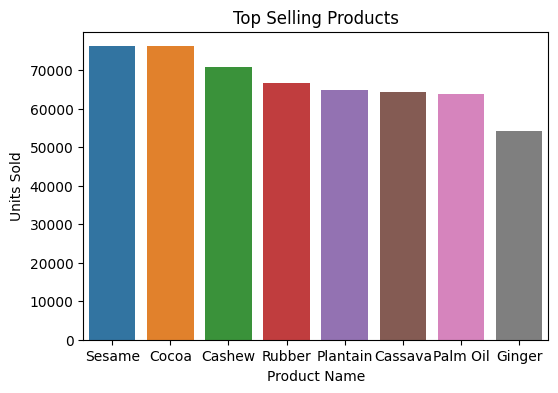

In [11]:
# finding the top selling products
top_products = ex.groupby('Product Name')['Units Sold'].sum().sort_values(ascending = False)

# plot 
plt.figure(figsize=(6,4))
sns.barplot(x=top_products.index, y=top_products.values)
plt.xlabel('Product Name')
plt.ylabel('Units Sold')
plt.title('Top Selling Products')


**1.2 Which company has the highest sales revenue**

Text(0.5, 1.0, "Company's Revenue")

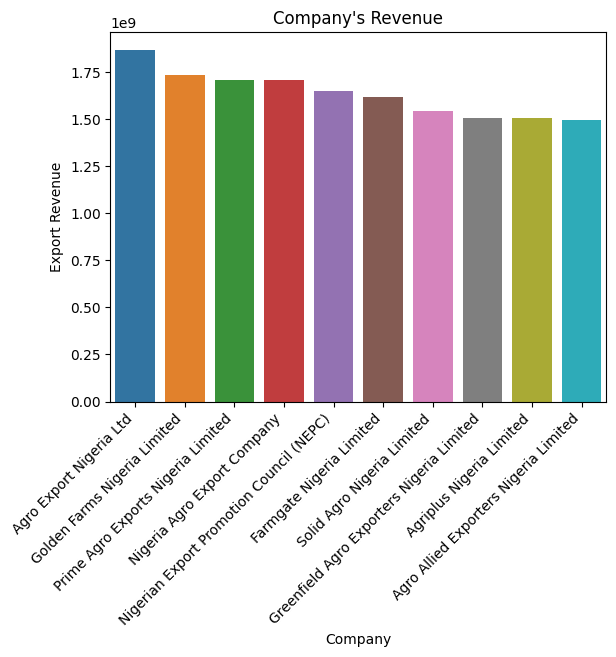

In [12]:
# finding company with the highest sales revenue
top_company_sales = ex.groupby('Company')['Export Value'].sum().sort_values(ascending = False)

# plot
sns.barplot(x=top_company_sales.index, y=top_company_sales.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Company')
plt.ylabel('Export Revenue')
plt.title("Company's Revenue")

**1.3 How do sales vary across different export countries? You should look at:**

a. Product sales

b. average revenue per country

c. total profit generated per country



Text(0.5, 1.0, 'Units Exported Per Country')

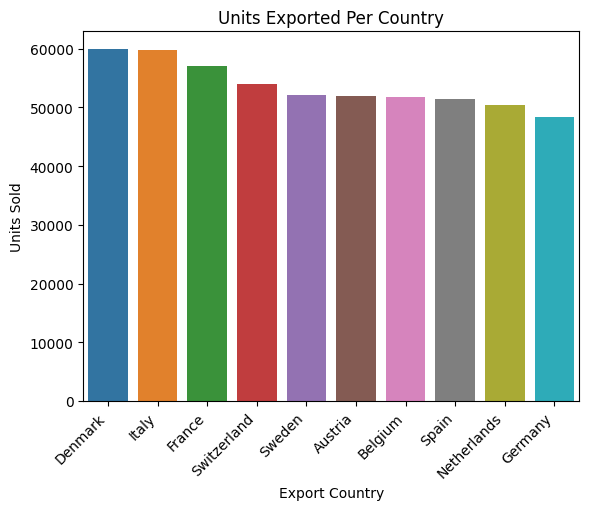

In [13]:
# finding units sold per export country
country_units_sold = ex.groupby('Export Country')['Units Sold'].sum().sort_values(ascending = False)

# plot
sns.barplot(x=country_units_sold.index, y=country_units_sold.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Export Country')
plt.ylabel('Units Sold')
plt.title('Units Exported Per Country')

Text(0.5, 1.0, 'Revenue Per Country')

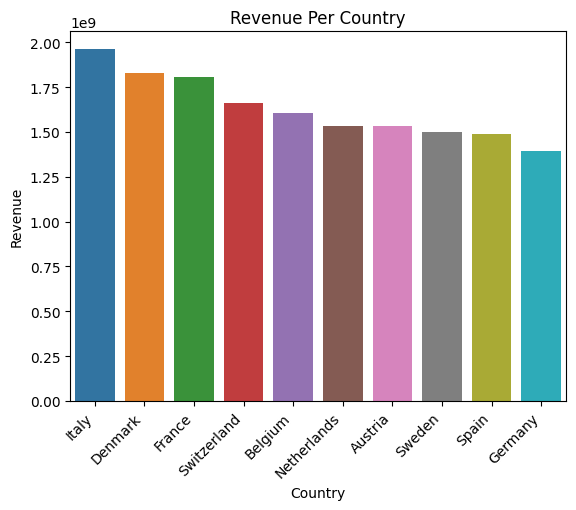

In [14]:
# finding revenue per country

# revenue = units sold * unit price
revenue_per_country = ex.groupby('Export Country')['Export Value'].sum().sort_values(ascending = False)

#plot
sns.barplot(x=revenue_per_country.index, y=revenue_per_country.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Revenue Per Country')

Text(0.5, 1.0, 'Profit From Each Country')

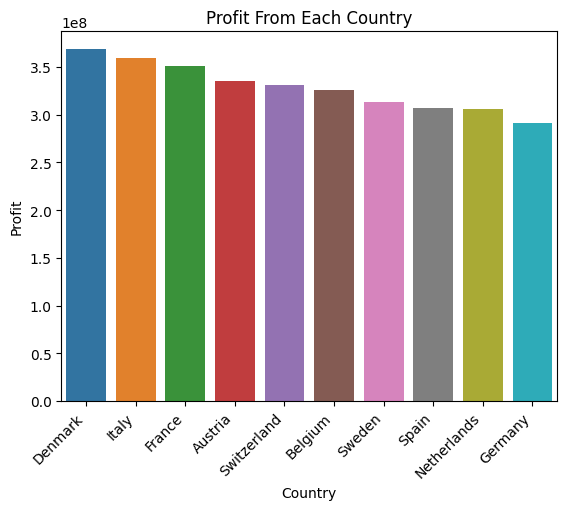

In [16]:
# country with most profit

# total profit = units sold * profit per unit
ex['Profit'] = ex['Units Sold'] * ex['Profit per unit']

#profit per country
profit_per_country = ex.groupby('Export Country')['Profit'].sum().sort_values(ascending = False)

# plot
sns.barplot(x=profit_per_country.index, y=profit_per_country.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.title('Profit From Each Country')

**1.4 Is there any correlation between the units sold and the profit generated?**

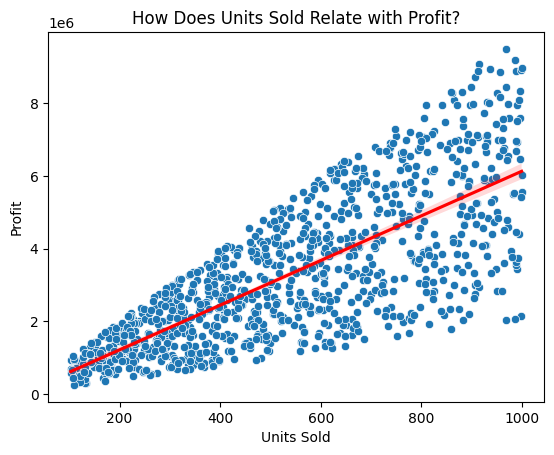

In [17]:
# find correlation between the units sold and profit generated

# scatter plot
sns.scatterplot(data = ex, x='Units Sold', y='Profit')
sns.regplot(data = ex, x='Units Sold', y='Profit', scatter=False, color='red')
plt.title('How Does Units Sold Relate with Profit?')
plt.show()

In [18]:
# correlation coefficient
profit_corr = ex['Profit'].corr(ex['Units Sold'])
print('The correlation between profit and units sold is: ', profit_corr)

The correlation between profit and units sold is:  0.7629331672996125


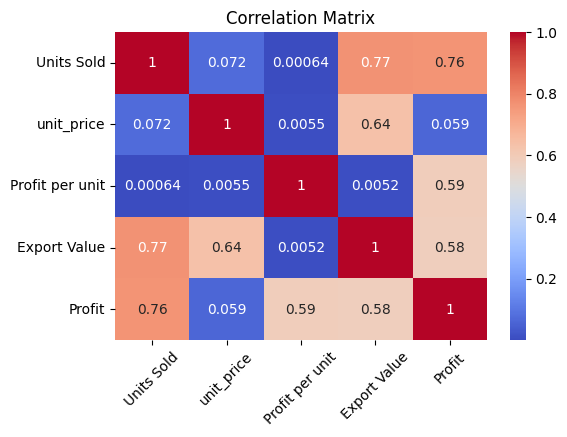

In [19]:
# find the correlation between different numerical variables
attributes = ['Units Sold', 'unit_price', 'Profit per unit', 'Export Value', 'Profit']

#correlation matrix
corr_matrix = ex[attributes].corr()

# plot heatmap
plt.figure(figsize=(6,4))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()

There is a positive correlation between amount of units sold and profit generated. An increase in units sold leads to an increase in profits generated.

#### **2. Time Series**

**2.1 How do sales vary over time (monthly, quarterly, annually)?**

Text(0.5, 1.0, 'Total Units Sold Per Month')

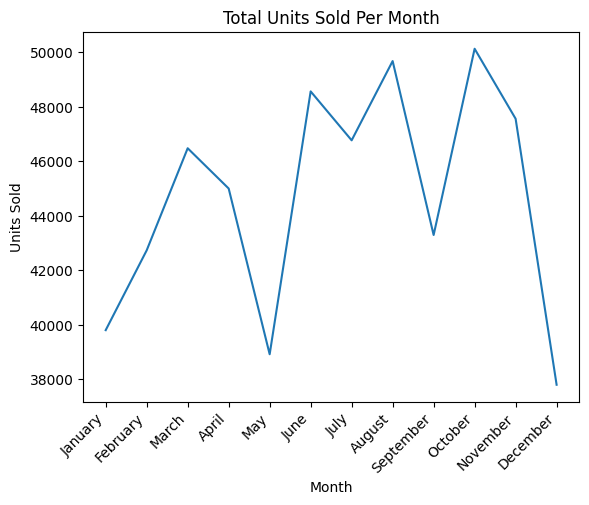

In [20]:
# units sold monthly
ex['Month'] = ex['Date'].apply(lambda x: x.strftime('%B'))

# monthly units sold
monthly_units_sold = ex.groupby('Month')['Units Sold'].sum().reset_index()

# sorting months in chronological order
from calendar import month_name
month_lookup = list(month_name)
monthly_units_sold.Month = sorted(monthly_units_sold.Month, key=month_lookup.index)

#plot
sns.lineplot(data = monthly_units_sold, x='Month', y='Units Sold')
plt.xticks(rotation=45, ha='right')
plt.title('Total Units Sold Per Month')

Text(0.5, 1.0, 'Total Units Sold Per Year')

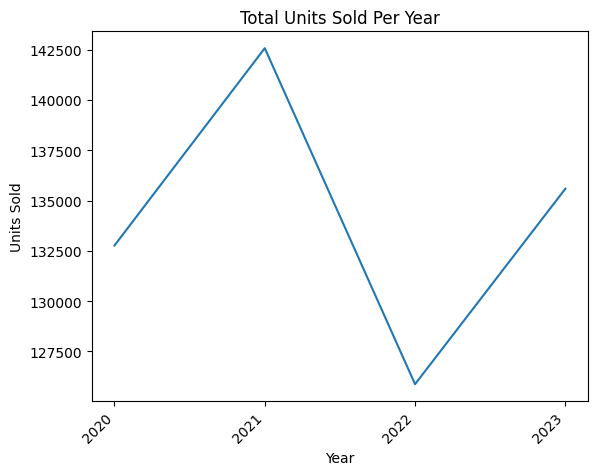

In [21]:
# units sold yearly
ex['Year'] = ex['Date'].dt.strftime('%Y')

# yearly units sold
yearly_units_sold = ex.groupby('Year')['Units Sold'].sum().reset_index()

#plot
sns.lineplot(data = yearly_units_sold, x='Year', y='Units Sold')
plt.xticks(rotation=45, ha='right')
plt.title('Total Units Sold Per Year')

In [22]:
# picking each product
xcashew = ex[ex['Product Name']=='Cashew']
xcassava = ex[ex['Product Name'] == 'Cassava']
xrubber = ex[ex['Product Name'] == 'Rubber']
xginger =ex[ex['Product Name'] == 'Ginger']
xpalmoil =ex[ex['Product Name'] == 'Palm Oil']
xplantain =ex[ex['Product Name'] =='Plantain']
xsesame =ex[ex['Product Name'] == 'Sesame']
xcocoa =ex[ex['Product Name'] =='Cocoa']

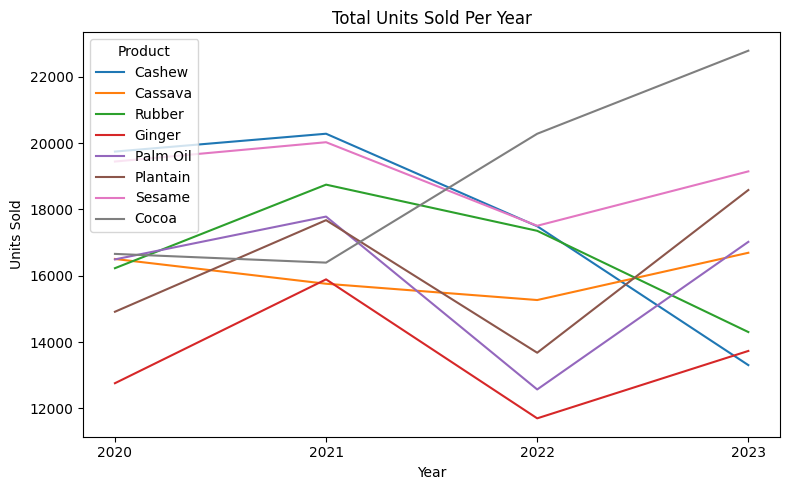

In [23]:
# function to plot yearly performance for units sold
def plot_time_series_performance(df, product_list, time_column):
    plt.figure(figsize=(8, 5))
    
    for product in product_list:
        product_data = ex[ex['Product Name'] == product]
        time_data = product_data.groupby(time_column)['Units Sold'].sum()
        sns.lineplot(x=time_data.index, y=time_data.values, label=product)
    
    plt.xlabel(time_column)
    plt.ylabel('Units Sold')
    plt.title(f'Total Units Sold Per {time_column}')
    plt.legend(title='Product')
    plt.tight_layout()
    plt.show()

# list of products
product_list = ['Cashew', 'Cassava', 'Rubber', 'Ginger', 'Palm Oil', 'Plantain', 'Sesame', 'Cocoa']

plot_time_series_performance(ex, product_list, 'Year')

Text(0.5, 1.0, 'Total Units Sold Per Quarter')

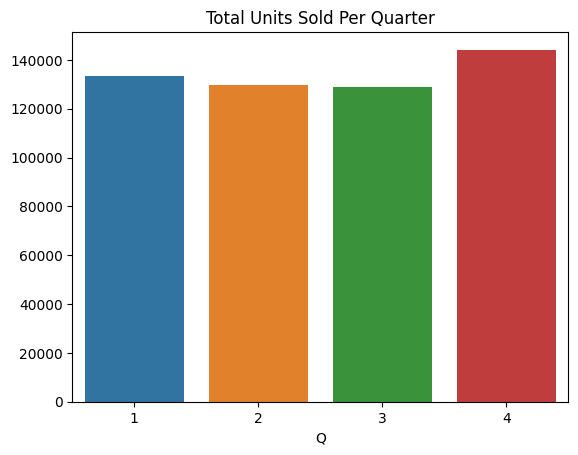

In [24]:
# units sold per quarter
ex['Q'] = ex['Date'].dt.quarter

quarterly_exports = ex.groupby('Q')['Units Sold'].sum()

# plot
sns.barplot(x=quarterly_exports.index, y=quarterly_exports.values)
plt.title('Total Units Sold Per Quarter')

**Findings**

* In 2022 there was a sharp dip in the number of units sold for most of the products, except for cocoa whose total units sold continued to increase.
* Rubber and cashew have had declining total number of units sold since 2021.
* Cassava has had the least number of fluctuations the units sold have not had big changes.
* Q4 had the highest number of units sold, Q1, Q2, Q3 had small variations in units sold

Text(0.5, 1.0, 'Volume of Exports Per Port')

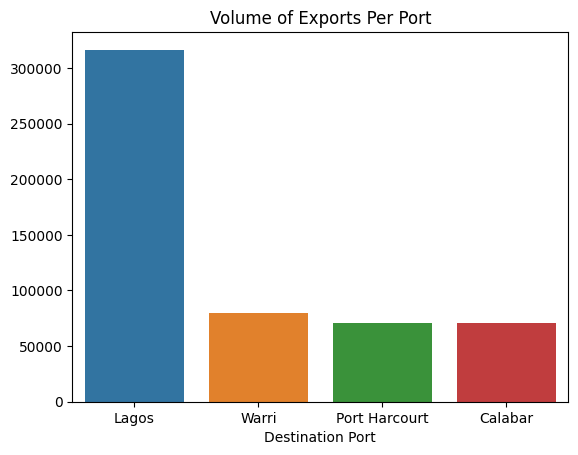

In [25]:
# Which destination ports receive the highest volume of exports?
port_volume = ex.groupby('Destination Port')['Units Sold'].sum().sort_values(ascending = False)

# plot
sns.barplot(x=port_volume.index, y=port_volume.values)
plt.title('Volume of Exports Per Port')

Text(0.5, 1.0, 'Export Value per Port')

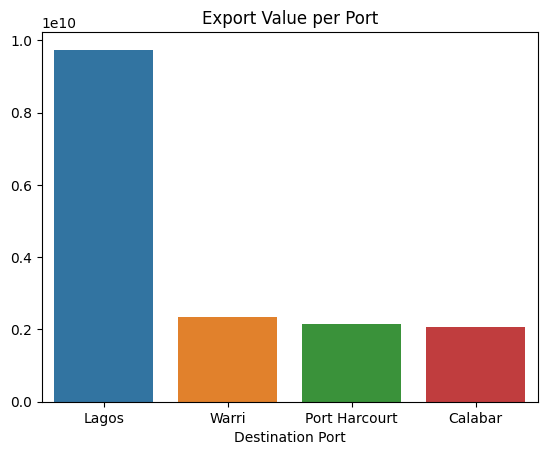

In [26]:
# Rank the destination port by the export value.
port_export_value = ex.groupby('Destination Port')['Export Value'].sum().sort_values(ascending = False)

#plot
sns.barplot(x = port_export_value.index, y = port_export_value.values)
plt.title('Export Value per Port')

   Destination Port Product Name  Units Sold  Rank
7           Calabar       Sesame       15409   1.0
6           Calabar       Rubber       10520   2.0
8             Lagos       Cashew       49146   1.0
10            Lagos        Cocoa       41685   2.0
20    Port Harcourt     Palm Oil       11669   1.0
23    Port Harcourt       Sesame       10959   2.0
26            Warri        Cocoa       13570   1.0
30            Warri       Rubber       12578   2.0


Text(0.5, 1.0, 'Top Products Per Port')

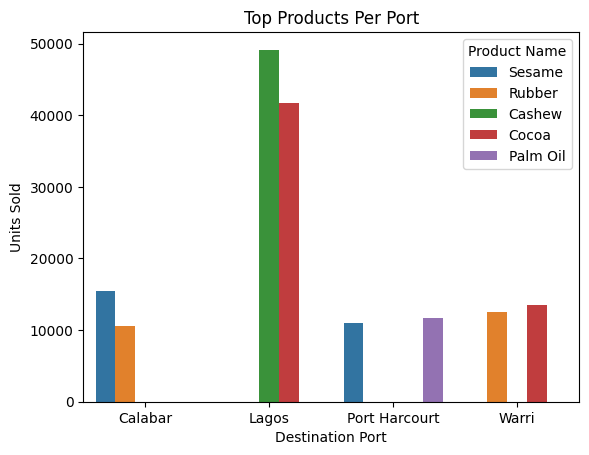

In [27]:
# Show the top export product for each port

# group products
port_products = ex.groupby(['Destination Port', 'Product Name'])['Units Sold'].sum().reset_index()

# rank the products
port_products['Rank'] = port_products.groupby('Destination Port')['Units Sold'].rank(ascending=False, method='first')

# filter top 2
top_products = (port_products[port_products['Rank'] <= 2]).sort_values(['Destination Port', 'Rank'])
print(top_products)

# plot
sns.barplot(data=top_products, x='Destination Port', y='Units Sold', hue='Product Name')
plt.title('Top Products Per Port')

**Findings**

* Lagos port had the largest volume of exports and also the greatest value of exports
* Cashew and cocoa were the largest units sold per port

#### **3. Performance Comparison**

**3.1 How does each product perform in terms of profit margin?**

Text(0.5, 1.0, 'Profit Margin Per Product')

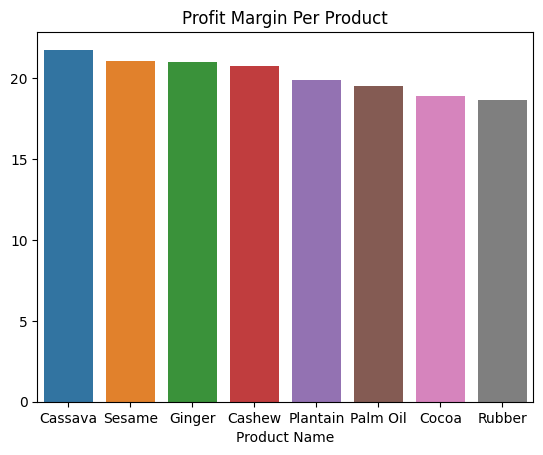

In [28]:
# profit margin for each product = profit/revenue * 100

# group by profit
product_profit = ex.groupby('Product Name')['Profit'].sum()

# group by revenue 
product_revenue =ex.groupby('Product Name')['Export Value'].sum()

# profit margin
profit_margin = ((product_profit/product_revenue) * 100).sort_values(ascending=False)

# plot
sns.barplot(x=profit_margin.index, y=profit_margin.values)
plt.title('Profit Margin Per Product')

Text(0.5, 1.0, 'Profit Trends Over the Years')

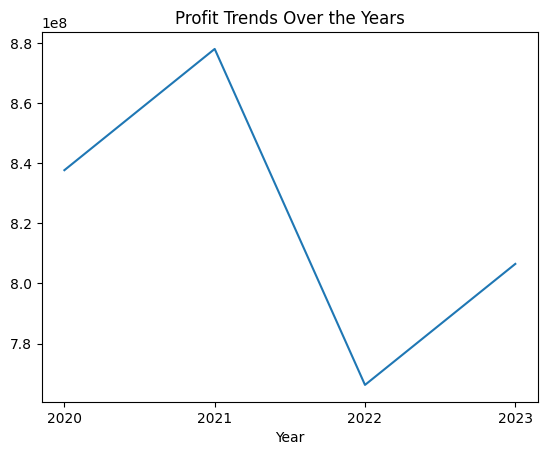

In [29]:
# total profit per year
# get year
ex['Year'] = ex['Date'].apply(lambda x: x.strftime('%Y'))

# profit per year
yearly_profit = ex.groupby('Year')['Profit'].sum()

# plot
sns.lineplot(x=yearly_profit.index, y=yearly_profit.values)
plt.title('Profit Trends Over the Years')

Text(0.5, 1.0, 'Yearly Profit Margin')

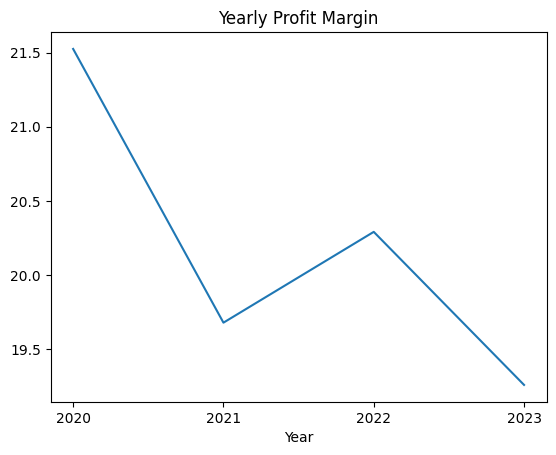

In [30]:
# yearly profit margin
yearly_revenue = ex.groupby('Year')['Export Value'].sum()

# profit margin
yearly_margin = (yearly_profit/yearly_revenue) * 100

# plot
sns.lineplot(x=yearly_margin.index, y=yearly_margin.values)
plt.title('Yearly Profit Margin')

**Findings**

* Cassava had the highest profit margin while rubber had the least
* 2021 had the highest profit and and 2022 had the least profit
* Despite 2022 having the least profit, it had a higher profit margin than 2022

**3.2 Can we compare the performance of different companies based on units sold and profit generated?**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Agro Export Nigeria Ltd'),
  Text(1, 0, 'Golden Farms Nigeria Limited'),
  Text(2, 0, 'Nigerian Export Promotion Council (NEPC)'),
  Text(3, 0, 'Farmgate Nigeria Limited'),
  Text(4, 0, 'Nigeria Agro Export Company'),
  Text(5, 0, 'Prime Agro Exports Nigeria Limited'),
  Text(6, 0, 'Solid Agro Nigeria Limited'),
  Text(7, 0, 'Greenfield Agro Exporters Nigeria Limited'),
  Text(8, 0, 'Agriplus Nigeria Limited'),
  Text(9, 0, 'Agro Allied Exporters Nigeria Limited')])

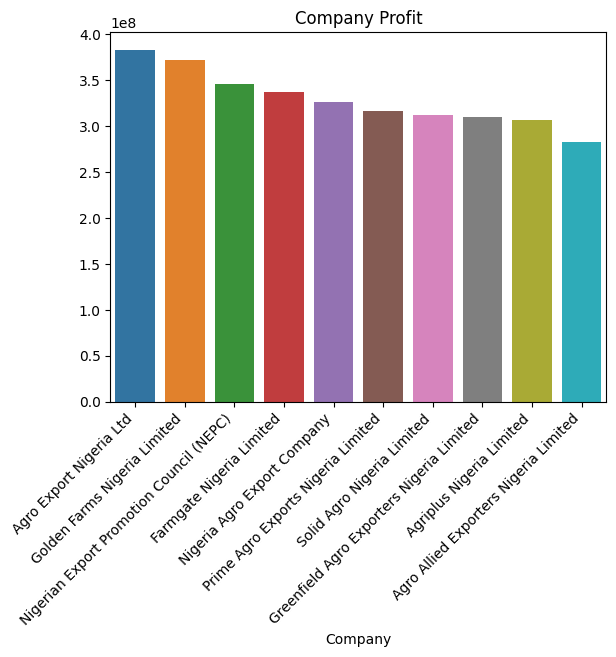

In [31]:
# profit of companies
company_profit = ex.groupby('Company')['Profit'].sum().sort_values(ascending=False)

#plot
sns.barplot(x=company_profit.index, y=company_profit.values)
plt.title('Company Profit')
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Golden Farms Nigeria Limited'),
  Text(1, 0, 'Nigerian Export Promotion Council (NEPC)'),
  Text(2, 0, 'Farmgate Nigeria Limited'),
  Text(3, 0, 'Greenfield Agro Exporters Nigeria Limited'),
  Text(4, 0, 'Agro Export Nigeria Ltd'),
  Text(5, 0, 'Agriplus Nigeria Limited'),
  Text(6, 0, 'Solid Agro Nigeria Limited'),
  Text(7, 0, 'Nigeria Agro Export Company'),
  Text(8, 0, 'Agro Allied Exporters Nigeria Limited'),
  Text(9, 0, 'Prime Agro Exports Nigeria Limited')])

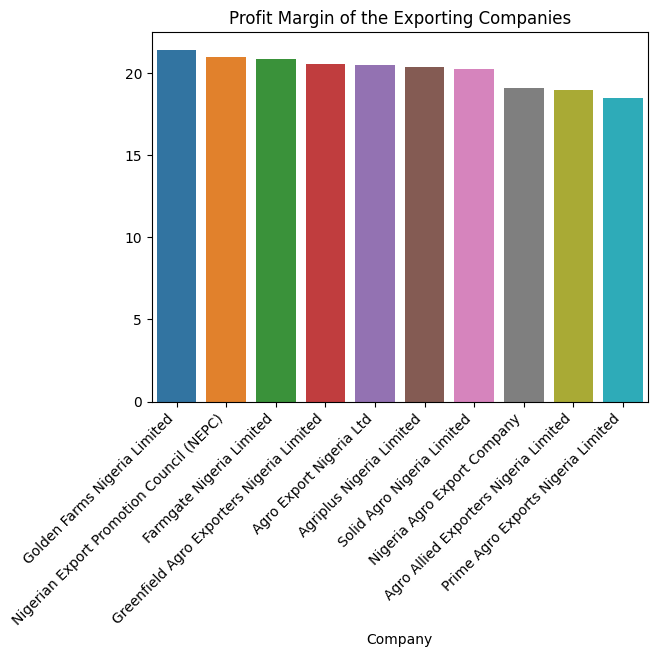

In [32]:
# company profit margin
# revenue
company_revenue = ex.groupby('Company')['Export Value'].sum()

# profit
company_profit = ex.groupby('Company')['Profit'].sum()

# profit margin
company_profit_margin = ((company_profit/company_revenue) * 100).sort_values(ascending = False)

# plot
sns.barplot(x=company_profit_margin.index, y=company_profit_margin.values)
plt.title('Profit Margin of the Exporting Companies')
plt.xticks(rotation=45, ha='right')

**Findings**

* Agro Export Nigeria LTD had the highest profit
* Golden Farms Nigeria Limited had the highest profit margin

**3.3 Are there any outliers or underperforming products/companies that need attention?**

Text(0.5, 1.0, 'Profit Distribution')

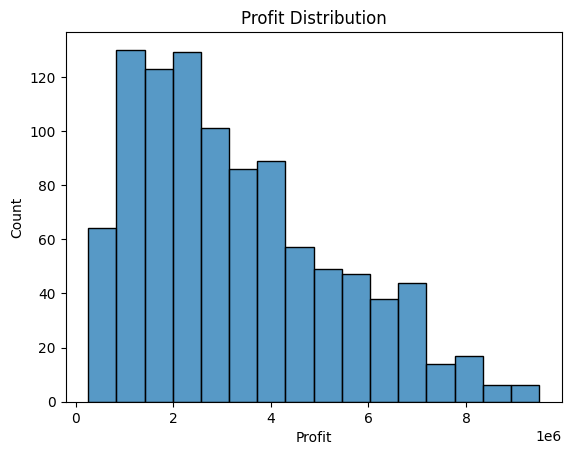

In [37]:
# barplot for profit
sns.histplot(x=ex['Profit'])
plt.title('Profit Distribution')

Text(0.5, 1.0, 'Distribution for Units Sold')

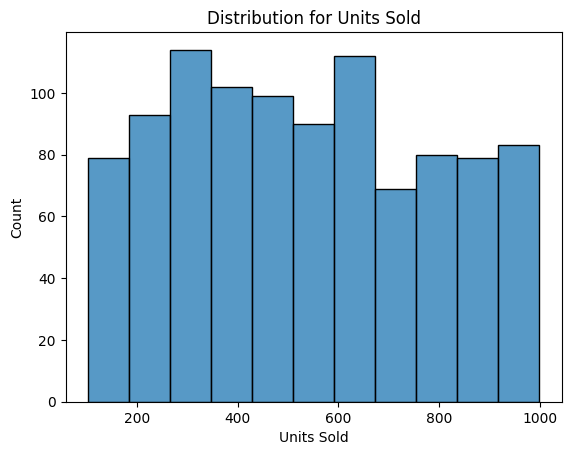

In [38]:
# barplot for units sold
sns.histplot(x=ex['Units Sold'])
plt.title('Distribution for Units Sold')

Text(0.5, 1.0, 'Distribution for Export Value')

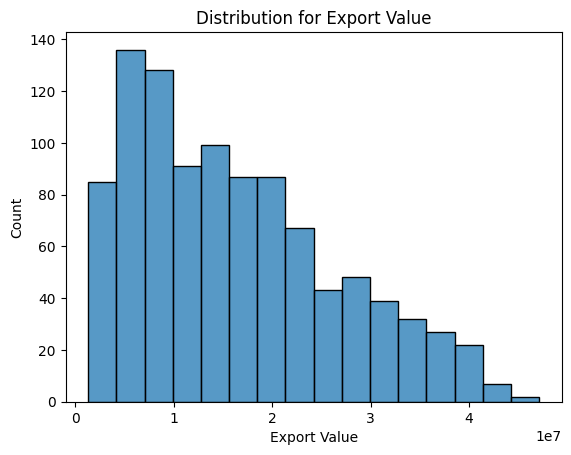

In [39]:
# barplot for export value
sns.histplot(x=ex['Export Value'])
plt.title('Distribution for Export Value')

**Findings**

* The profit is skewed to the right. Majority of companies seem to have a smaller profit.
* The number of units sold is almost uniformly distributed
* The export value is skewed to the right. Few companies have a high export value